### Example

* Suppose we have two samples that represent biki ride durations for two distinct neighborhoods `a` and `b`

1. Instead of working with actual data, sample the data from a gaussian the same mean ($\mu=20$) the same same standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`
    

In [10]:
# Write your code here 

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

np.random.seed(0)

mu, sigma, sample = 20, 4, 15 # mean and standard deviation
ride_time_a = np.random.normal(mu, sigma, sample)
ride_time_b = np.random.normal(mu, sigma, sample)


### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

In [21]:
# Write your code here 

a = np.mean(ride_time_a)
b = np.mean(ride_time_b)

print('Mean of a: ', a)
print('Mean of b : ', b)
print('Difference between the two:', a-b)
print("As shown above, the difference between the two means is 1.95. Thus, there isn't a statistically significant different between the two samples.")


Mean of a:  22.748033269279322
Mean of b :  20.794818308826077
Difference between the two: 1.953214960453245
As shown above, the difference between the two means is 1.95. Thus, there isn't a statistically significant different between the two samples.


### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

Text(0, 0.5, 'Density')

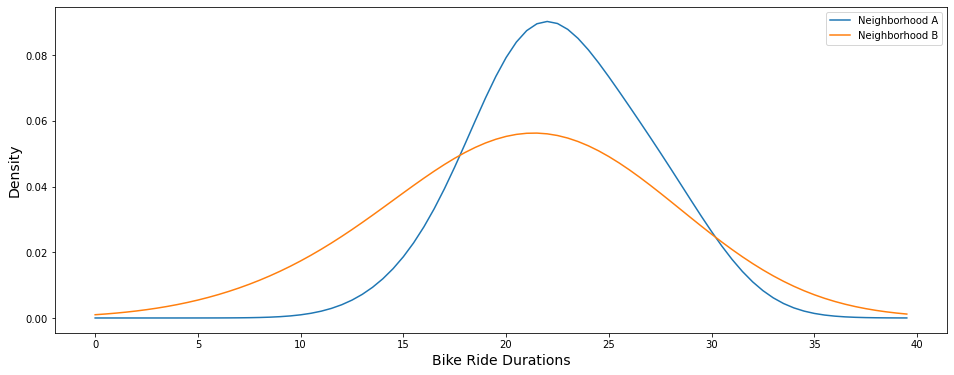

In [15]:
# Write your code here 

import scipy.stats as stats
x_axis = np.arange(0, 40, 0.5)
kde_1 = sp.stats.gaussian_kde(ride_time_a, bw_method=0.8)
kde_2 = sp.stats.gaussian_kde(ride_time_b, bw_method=1)

x_densities_1 = kde_1.evaluate(x_axis)
x_densities_2 = kde_2.evaluate(x_axis)

plt.figure(figsize=(16,6))

plt.plot(x_axis, x_densities_1, label="Neighborhood A")
plt.plot(x_axis, x_densities_2, label="Neighborhood B")

plt.legend()
plt.xlabel('Bike Ride Durations', fontsize=14)
plt.ylabel('Density', fontsize=14)



### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

Yes, it does. Although the mean of A and B are similar, the peek is different.
The peek for A seems to be 23, and for B is 21.
Visually, we can see that the neighborhood A is much higher than B, while B is much wider and spread out.


### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


In [20]:
# Write your code here 
data = np.concatenate([ride_time_a,ride_time_b])
means_difference = []

for _ in range(1000):
    np.random.shuffle(data)
    new_time_a = data[:20]
    new_time_b = data[20:]
    means_difference.append(np.mean(new_time_a) - np.mean(new_time_b))

p_val = sum(means_difference >= (a - b)) / len(means_difference)
print('P-val: ', p_val)
print("As we know, a p-value less than 0.05 (typically ≤ 0.05) is statistically significant. Since the p-value is 0.112, then there is no statistical significance between the two datasets")

P-val:  0.124
As we know, a p-value less than 0.05 (typically ≤ 0.05) is statistically significant. Since the p-value is 0.112, then there is no statistical significance between the two datasets


### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

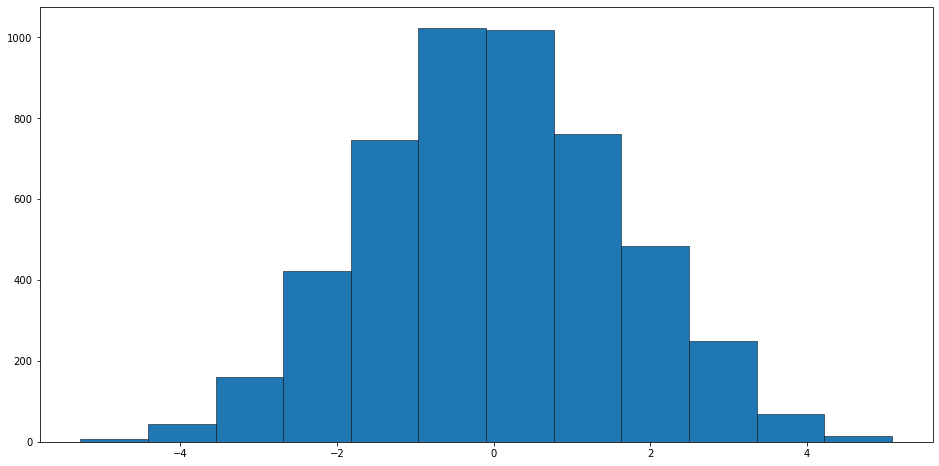

In [29]:
# Write your code here 
plt.figure(figsize=(16,8))
_ = plt.hist(difference, edgecolor='k', linewidth=0.5, bins=12)